In [ ]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# Airbags Logistic Regression

### Import modules

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/Users/danielcorcoran/PycharmProjects/daniels_mac_proj/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Visualisation Settings

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc("font", size=14)
sns.set(rc={'figure.figsize':(7,5.5)})
sns.set_style('whitegrid')
sns.set_palette('Set3')

### Logistic Regression Assumptions

In [4]:
#  Binary logistic regression requires the dependent variable to be binary.
#  For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
#  Only the meaningful variables should be included.
#  The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#  The independent variables are linearly related to the log odds.
#  Logistic regression requires quite large sample sizes.

### Data

In [5]:
data = pd.read_csv(r"C:\Users\admin-vicvphq\PycharmProjects\datasets\CLEANED_AIRBAGS_06-00-2018_1300PM.csv")

In [6]:
data.head(6) #first 11 columns

,ROW_INDEX,COLUMN1,DVCAT,WEIGHT,DEAD,AIRBAG,SEATBELT,FRONTAL,SEX,AGEOFOCC,YEARACC,YEARVEH,ABCAT,OCCROLE,DEPLOY,INJSEVERITY
0,1405,12887,10-24 KMPH,936.125,ALIVE,AIRBAG,BELTED,1,MALE,17,1999,1993,NODEPLOY,DRIVER,0,0
1,7100,17295,10-24 KMPH,260.033,ALIVE,AIRBAG,BELTED,1,MALE,21,2000,1997,DEPLOY,DRIVER,1,1
2,17108,26201,25-39 KMPH,225.957,ALIVE,AIRBAG,NONE,0,MALE,28,2002,2001,NODEPLOY,DRIVER,0,1
3,4451,12886,10-24 KMPH,936.125,ALIVE,NONE,NONE,0,MALE,70,1999,1979,UNAVAIL,DRIVER,0,0
4,12415,17294,10-24 KMPH,260.033,ALIVE,AIRBAG,NONE,0,MALE,27,2000,1995,NODEPLOY,DRIVER,0,2
5,26084,12884,1-9 KMPH,3.199,ALIVE,AIRBAG,BELTED,0,MALE,50,1999,1997,DEPLOY,DRIVER,1,3


In [7]:
data.shape

(26217, 16)

In [8]:
data = data.drop(["ROW_INDEX", "COLUMN1", "INJSEVERITY"], axis = 1)

In [9]:
data.head(4)

,DVCAT,WEIGHT,DEAD,AIRBAG,SEATBELT,FRONTAL,SEX,AGEOFOCC,YEARACC,YEARVEH,ABCAT,OCCROLE,DEPLOY
0,10-24 KMPH,936.125,ALIVE,AIRBAG,BELTED,1,MALE,17,1999,1993,NODEPLOY,DRIVER,0
1,10-24 KMPH,260.033,ALIVE,AIRBAG,BELTED,1,MALE,21,2000,1997,DEPLOY,DRIVER,1
2,25-39 KMPH,225.957,ALIVE,AIRBAG,NONE,0,MALE,28,2002,2001,NODEPLOY,DRIVER,0
3,10-24 KMPH,936.125,ALIVE,NONE,NONE,0,MALE,70,1999,1979,UNAVAIL,DRIVER,0


In [10]:
data.shape

(26217, 13)

In [11]:
for column in data.columns:
    unique_values = data[column].value_counts().count()
    print(str(column) +' has '+ str(unique_values) + ' unique values.')

DVCAT has 5 unique values.
WEIGHT has 10131 unique values.
DEAD has 2 unique values.
AIRBAG has 2 unique values.
SEATBELT has 2 unique values.
FRONTAL has 2 unique values.
SEX has 2 unique values.
AGEOFOCC has 82 unique values.
YEARACC has 6 unique values.
YEARVEH has 46 unique values.
ABCAT has 3 unique values.
OCCROLE has 2 unique values.
DEPLOY has 2 unique values.


### Meeting condition 1: No Nulls

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 13 columns):
DVCAT       26217 non-null object
WEIGHT      26217 non-null float64
DEAD        26217 non-null object
AIRBAG      26217 non-null object
SEATBELT    26217 non-null object
FRONTAL     26217 non-null int64
SEX         26217 non-null object
AGEOFOCC    26217 non-null int64
YEARACC     26217 non-null int64
YEARVEH     26217 non-null object
ABCAT       26217 non-null object
OCCROLE     26217 non-null object
DEPLOY      26217 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 2.6+ MB


### Meeting condition 2: Sufficient Records

In [13]:
data.shape[0]/data.shape[1]

2016.6923076923076

In [14]:
# condition is 50 records per variable, we have 1532 per variable

### Meeting condition 3: Target is binary or ordinal

In [15]:
data['DEAD'].value_counts()

ALIVE    25037
DEAD      1180
Name: DEAD, dtype: int64

In [16]:
#there are only 2 values in the target varible, target is binary.

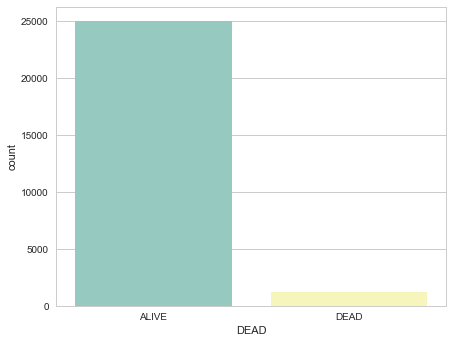

In [17]:
sns.countplot(data = data, x = 'DEAD')

### Meeting condition 4: Little to no multicollinearity

### Data Exploration

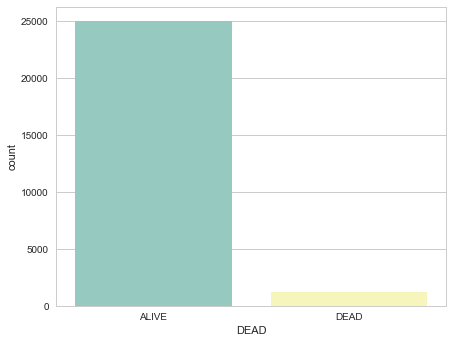

In [18]:
sns.countplot(data= data, x = 'DEAD')

In [19]:
data.groupby('DEAD').mean()

,WEIGHT,FRONTAL,AGEOFOCC,YEARACC,DEPLOY
DEAD,,,,,
ALIVE,482.004109,0.650397,36.857012,1999.562488,0.338219
DEAD,55.589090,0.493220,44.615254,1999.408475,0.311864


### Observations

In [20]:
# age is higher on average for dead drivers
# frontal is lower on average for dead drivers
# deploy is slightly higher for alive drivers

### Visualizations

Text(0.5,1,'SEX COMPARISON')

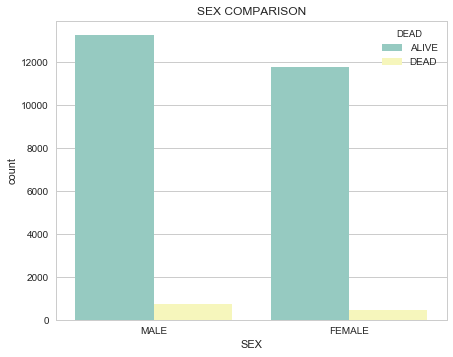

In [21]:
x_name = "SEX"
sns.countplot(data = data, x = x_name, hue = 'DEAD')
plt.title(str(x_name) + " COMPARISON")

Text(0,0.5,'frequency')

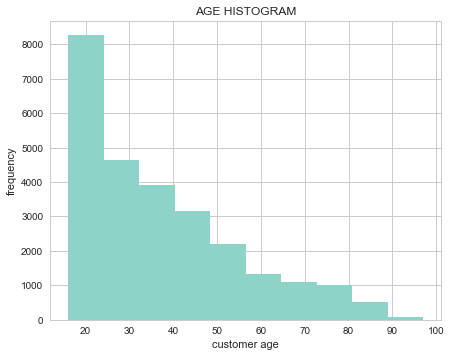

In [22]:
data.AGEOFOCC.hist()
plt.title("AGE HISTOGRAM")
plt.xlabel("customer age")
plt.ylabel("frequency")

In [23]:
#most crashes are in the 20-30s age range

In [24]:
cutted = pd.cut(data['AGEOFOCC'], 10)
cutted.value_counts()

(15.919, 24.1]    8270
(24.1, 32.2]      4631
(32.2, 40.3]      3905
(40.3, 48.4]      3153
(48.4, 56.5]      2194
(56.5, 64.6]      1343
(64.6, 72.7]      1107
(72.7, 80.8]      1021
(80.8, 88.9]       519
(88.9, 97.0]        74
Name: AGEOFOCC, dtype: int64

### Creating Dummy Variables

In [25]:
#converting categorical columns into binary columns

cat_vars = ['DVCAT','DEAD','AIRBAG','SEATBELT','SEX','ABCAT','OCCROLE']

for var in cat_vars:
    cat_list = 'var' + "_" + var
    cat_list = pd.get_dummies(data[var], prefix = var, drop_first = True)
    data1 = data.join(cat_list)
    data = data1

cat_vars = ['DVCAT','DEAD','AIRBAG','SEATBELT','SEX','ABCAT','OCCROLE']

data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [26]:
data_final = data[to_keep]
data_final.columns.values

array(['WEIGHT', 'FRONTAL', 'AGEOFOCC', 'YEARACC', 'YEARVEH', 'DEPLOY',
       'DVCAT_10-24 KMPH', 'DVCAT_25-39 KMPH', 'DVCAT_40-54 KMPH',
       'DVCAT_55+ KMPH', 'DEAD_DEAD', 'AIRBAG_NONE', 'SEATBELT_NONE',
       'SEX_MALE', 'ABCAT_NODEPLOY', 'ABCAT_UNAVAIL', 'OCCROLE_PASS'], dtype=object)

In [27]:
data_final.shape

(26217, 17)

In [28]:
data_final_2002_only = data_final[data_final["YEARACC"] == 2002]

In [29]:
data_final_2002_only.shape

(4764, 17)

In [30]:
data_final = data_final[data_final["YEARACC"] != 2002]

In [31]:
data_final.shape

(21453, 17)

In [32]:
data_final = data_final[data_final["YEARVEH"] != "NAN"]

In [33]:
data_final.groupby("YEARVEH")["AGEOFOCC"].count()

YEARVEH
1956       2
1959       1
1961       1
1963       4
1964       1
1965       4
1966      17
1967       8
1968      12
1969      23
1970      15
1971      15
1972      21
1973      34
1974      22
1975      27
1976      32
1977      53
1978     107
1979     120
1980     100
1981     128
1982     175
1983     247
1984     469
1985     639
1986     819
1987     930
1988    1120
1989    1166
1990    1174
1991    1199
1992    1197
1993    1370
1994    1544
1995    1742
1996    1577
1997    1618
1998    1529
1999    1126
2000     772
2001     267
2002      25
Name: AGEOFOCC, dtype: int64

### Feature Selection (RFE) 

In [34]:
data_final_vars=data_final.columns.values.tolist()
y=['DEAD_DEAD']
X=[i for i in data_final_vars if i not in y]

In [35]:
#using recursive feature elimination to remove irrelevant columns

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#where 10 is features to be selected
rfe = RFE(logreg, 10) 
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

H:\Data\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True False False False  True  True  True  True  True  True  True
 False  True  True False]
[5 1 4 6 7 1 1 1 1 1 1 1 3 1 1 2]


In [36]:
rfe_support_list = rfe.support_.tolist()
print(rfe_support_list)

[False, True, False, False, False, True, True, True, True, True, True, True, False, True, True, False]


### Collecting relevant columns

In [37]:
data_final_columns = data_final[X].columns.tolist()

for n in range(len(rfe_support_list)):
    
    print(str(rfe_support_list[n]) +" : "+  data_final_columns[n])


False : WEIGHT
True : FRONTAL
False : AGEOFOCC
False : YEARACC
False : YEARVEH
True : DEPLOY
True : DVCAT_10-24 KMPH
True : DVCAT_25-39 KMPH
True : DVCAT_40-54 KMPH
True : DVCAT_55+ KMPH
True : AIRBAG_NONE
True : SEATBELT_NONE
False : SEX_MALE
True : ABCAT_NODEPLOY
True : ABCAT_UNAVAIL
False : OCCROLE_PASS


In [38]:
relevant_columns = []
for n in range(len(rfe_support_list)):
    if rfe_support_list[n] == True:
        relevant_columns.append(data_final_columns[n])
relevant_columns

['FRONTAL',
 'DEPLOY',
 'DVCAT_10-24 KMPH',
 'DVCAT_25-39 KMPH',
 'DVCAT_40-54 KMPH',
 'DVCAT_55+ KMPH',
 'AIRBAG_NONE',
 'SEATBELT_NONE',
 'ABCAT_NODEPLOY',
 'ABCAT_UNAVAIL']

In [39]:
X = data_final[relevant_columns]
y = data_final['DEAD_DEAD']

### Implementing the model

In [40]:
# from scipy import stats
# stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# import statsmodels.api as sm
# logit_model = sm.Logit(y,X)
# results = logit_model.fit()
# print(results.summary())

In [41]:
#check that p values are less than 0.05

### Logistic Regression Model Fitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
for n in logreg.coef_.tolist():
    print(n)

[-1.1232850407634283, -0.9191391371965583, -0.7870836988852012, 0.5976296098563609, 1.7207278863681426, 2.8334626921488484, -0.44982180158181256, 0.9183858132621554, -1.2990375093547326, -0.44982180158181256]


In [44]:
logreg.intercept_

array([-2.66799845])

In [45]:
X.columns

Index(['FRONTAL', 'DEPLOY', 'DVCAT_10-24 KMPH', 'DVCAT_25-39 KMPH',
       'DVCAT_40-54 KMPH', 'DVCAT_55+ KMPH', 'AIRBAG_NONE', 'SEATBELT_NONE',
       'ABCAT_NODEPLOY', 'ABCAT_UNAVAIL'],
      dtype='object')

In [46]:
len(X.columns)

10

### Predicting test set results and calculating the accuracy

In [47]:
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


### Cross Validation

In [48]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.955


In [49]:
#if the accuracy remains close to the accuracy of the logistic regression classifier on test set above the model 'generalizes well'

### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)

[[6105   18]
 [ 288   25]]


In [51]:
# 6105 + 25 correct predictions
# 288 + 18 incorrect predictions 

### Compute precision, recall, F-measure and support

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      6123
          1       0.58      0.08      0.14       313

avg / total       0.94      0.95      0.93      6436



### ROC Curve

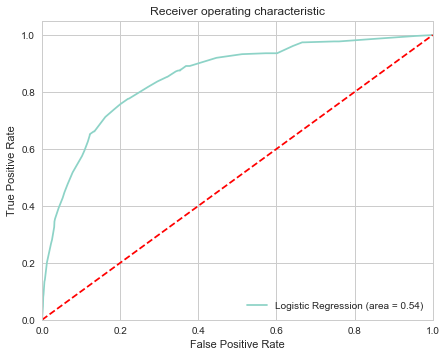

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


## Tests Below


In [54]:
data_final_2002_only.to_csv("data_final_2002.csv")